# Notes

This notebook analyses the subhalos created by Illustris_Zhang_Method/batch_jobs/batch_scripts/get_subhaloIDs_1.py.

These subhalo IDs were generated from the pipes created using raven:/u/cwalker/Illustris_Zhang_Method/ batch_jobs/batch_scripts/make_pipes_5.py.

- It calculates the number of unique (SubhaloID!=-1) subhalos which are traversed by 5125 pipes for each snapshot.
- It calculates the statistics of the number of subhalos traversed by lines of sight created using these pipes. The code to calculate these statistics builds upon Illustris_Zhang_Method/Paper_Plots_DMs.ipynb
- Additionally it refines the search, calculating unique GALAXIES traversed using the definitions: Stellar particles > 0 as discussed in: https://www.tng-project.org/data/forum/topic/235/how-to-identify-subhalos-containing-well-formed-ga/
- I could additionally refine further by calculating the number of unique GALAXIES traversed which are well-resolved using number of stellar particles > X, (https://www.tng-project.org/data/forum/topic/235/how-to-identify-subhalos-containing-well-formed-ga/ uses 100 as an example) Note: how does this equate to mass? let X = such that a 10^9 Msun galaxy is resolved into 2+ particles according to: https://www.tng-project.org/data/forum/topic/286/halos-with-many-subhalos-that-have-zero-stellar-ma/ (which shows how simulation resolution is important). But https://www.tng-project.org/data/forum/topic/18/mass-of-each-starwind-particle/ notes that star particle masses are not constant between subhalos. So for now, leave this unless requested.

# Imports

In [37]:
import numpy as np
import os
from matplotlib import pyplot as plt
import illustris_python as il


# Begin

In [5]:
#load files
files = os.listdir('./SpeedTempTest/')

#extract subhalo id files
shID_files_99 = [i for i in files if 'snap_99_' in i]
shID_files_99 = [i for i in shID_files_99 if 'true' in i]
shID_files_99.sort()
shID_files_91 = [i for i in files if 'snap_91_' in i]
shID_files_91 = [i for i in shID_files_91 if 'true' in i]
shID_files_91.sort()
shID_files_84 = [i for i in files if 'snap_84_' in i]
shID_files_84 = [i for i in shID_files_84 if 'true' in i]
shID_files_84.sort()
shID_files_78 = [i for i in files if 'snap_78_' in i]
shID_files_78 = [i for i in shID_files_78 if 'true' in i]
shID_files_78.sort()
shID_files_72 = [i for i in files if 'snap_72_' in i]
shID_files_72 = [i for i in shID_files_72 if 'true' in i]
shID_files_72.sort()
shID_files_67 = [i for i in files if 'snap_67_' in i]
shID_files_67 = [i for i in shID_files_67 if 'true' in i]
shID_files_67.sort()
shID_files_59 = [i for i in files if 'snap_59_' in i]
shID_files_59 = [i for i in shID_files_59 if 'true' in i]
shID_files_59.sort()
shID_files_50 = [i for i in files if 'snap_50_' in i]
shID_files_50 = [i for i in shID_files_50 if 'true' in i]
shID_files_50.sort()
shID_files_40 = [i for i in files if 'snap_40_' in i]
shID_files_40 = [i for i in shID_files_40 if 'true' in i]
shID_files_40.sort()
shID_files_33 = [i for i in files if 'snap_33_' in i]
shID_files_33 = [i for i in shID_files_33 if 'true' in i]
shID_files_33.sort()
shID_files_25 = [i for i in files if 'snap_25_' in i]
shID_files_25 = [i for i in shID_files_25 if 'true' in i]
shID_files_25.sort()
shID_files_21 = [i for i in files if 'snap_21_' in i]
shID_files_21 = [i for i in shID_files_21 if 'true' in i]
shID_files_21.sort()
shID_files_17 = [i for i in files if 'snap_17_' in i]
shID_files_17 = [i for i in shID_files_17 if 'true' in i]
shID_files_17.sort()

print(shID_files_99)
print(len(shID_files_99))
print(shID_files_99[0])

['sim_TNG300-1_snap_99_pipe_0_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1000_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1001_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1002_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1003_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1004_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1005_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1006_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1007_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1008_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1009_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_100_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1010_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1011_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1012_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1013_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1014_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1015_true_shID_list.npy', 'sim_TNG300-1_snap_99_pipe_1016_true_shID_list.np

In [6]:
#load the number of unique subhalos (not -1) traversered by each pipe for statistics

unique_sh_IDs_99 = []
for i in shID_files_99:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_99.append(unique_sh_ID_count)
unique_sh_IDs_99 = np.array(unique_sh_IDs_99)
print(unique_sh_IDs_99)

[2 1 2 ... 1 1 0]


In [192]:
##### using https://www.tng-project.org/data/forum/topic/235/how-to-identify-subhalos-containing-well-formed-ga/
#determine which of these subhalos are galaxies
# minimal definition: stellar mass is nonzero SubhaloMassType[4]>0
# more stringent definition is subhalo is well resolved. The example used is (SubhaloLenType[4]>100)

sim_to_load = 'TNG300-1' #which simulation to use
basePath = '/virgotng/universe/IllustrisTNG/{0}/output/'.format(sim_to_load)
snap_number = 99

unique_gals_all_99 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_99 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_99)): #for each file...
    
    shID_file = shID_files_99[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_99.append(unique_gals_all_count)
    unique_gals_wr_99.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_99 = np.array(unique_gals_all_99)
unique_gals_wr_99 = np.array(unique_gals_wr_99)

print('all galaxies (snap 99): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_99,unique_gals_wr_99))
print(np.where(unique_gals_all_99>1))    
    
    
        
    



all galaxies (snap 99): [2 1 2 ... 1 1 0], well-resolved galaxies: [1 1 2 ... 0 0 0]
(array([   0,    2,    3, ..., 5113, 5114, 5121]),)


In [153]:
unique_sh_IDs_91 = []
for i in shID_files_91:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_91.append(unique_sh_ID_count)
unique_sh_IDs_91 = np.array(unique_sh_IDs_91)

In [194]:
snap_number = 91

unique_gals_all_91 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_91 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_91)): #for each file...
    
    shID_file = shID_files_91[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_91.append(unique_gals_all_count)
    unique_gals_wr_91.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_91 = np.array(unique_gals_all_91)
unique_gals_wr_91 = np.array(unique_gals_wr_91)

print('all galaxies (snap 91): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_91,unique_gals_wr_91))
print(np.where(unique_gals_all_91>1))

all galaxies (snap 91): [0 0 0 ... 0 1 3], well-resolved galaxies: [0 0 0 ... 0 0 2]
(array([   5,   18,   19, ..., 5118, 5119, 5124]),)


In [155]:
unique_sh_IDs_84 = []
for i in shID_files_84:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_84.append(unique_sh_ID_count)
unique_sh_IDs_84 = np.array(unique_sh_IDs_84)

In [195]:
snap_number = 84

unique_gals_all_84 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_84 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_84)): #for each file...
    
    shID_file = shID_files_84[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_84.append(unique_gals_all_count)
    unique_gals_wr_84.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_84 = np.array(unique_gals_all_84)
unique_gals_wr_84 = np.array(unique_gals_wr_84)

print('all galaxies (snap 84): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_84,unique_gals_wr_84))
print(np.where(unique_gals_all_84>1))

all galaxies (snap 84): [2 0 0 ... 0 0 0], well-resolved galaxies: [1 0 0 ... 0 0 0]
(array([   0,    8,    9, ..., 5109, 5119, 5120]),)


In [9]:
unique_sh_IDs_78 = []
for i in shID_files_78:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_78.append(unique_sh_ID_count)
unique_sh_IDs_78 = np.array(unique_sh_IDs_78)

In [196]:
snap_number = 78

unique_gals_all_78 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_78 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_78)): #for each file...
    
    shID_file = shID_files_78[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_78.append(unique_gals_all_count)
    unique_gals_wr_78.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_78 = np.array(unique_gals_all_78)
unique_gals_wr_78 = np.array(unique_gals_wr_78)

print('all galaxies (snap 78): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_78,unique_gals_wr_78))
print(np.where(unique_gals_all_78>1))

all galaxies (snap 78): [0 0 0 ... 0 2 1], well-resolved galaxies: [0 0 0 ... 0 0 1]
(array([   6,   10,   16, ..., 5120, 5121, 5123]),)


In [158]:
unique_sh_IDs_72 = []
for i in shID_files_72:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_72.append(unique_sh_ID_count)
unique_sh_IDs_72 = np.array(unique_sh_IDs_72)

In [197]:
snap_number = 72

unique_gals_all_72 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_72 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_72)): #for each file...
    
    shID_file = shID_files_72[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_72.append(unique_gals_all_count)
    unique_gals_wr_72.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_72 = np.array(unique_gals_all_72)
unique_gals_wr_72 = np.array(unique_gals_wr_72)

print('all galaxies (snap 72): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_72,unique_gals_wr_72))
print(np.where(unique_gals_all_72>1))

all galaxies (snap 72): [3 1 0 ... 1 0 2], well-resolved galaxies: [1 1 0 ... 0 0 1]
(array([   0,    7,   13, ..., 5120, 5121, 5124]),)


In [160]:
unique_sh_IDs_67 = []
for i in shID_files_67:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_67.append(unique_sh_ID_count)
unique_sh_IDs_67 = np.array(unique_sh_IDs_67)

In [198]:
snap_number = 67

unique_gals_all_67 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_67 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_67)): #for each file...
    
    shID_file = shID_files_67[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_67.append(unique_gals_all_count)
    unique_gals_wr_67.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_67 = np.array(unique_gals_all_67)
unique_gals_wr_67 = np.array(unique_gals_wr_67)

print('all galaxies (snap 67): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_67,unique_gals_wr_67))
print(np.where(unique_gals_all_67>1))

all galaxies (snap 67): [1 0 4 ... 1 3 3], well-resolved galaxies: [0 0 1 ... 0 1 0]
(array([   2,    5,    9, ..., 5121, 5123, 5124]),)


In [162]:
unique_sh_IDs_59 = []
for i in shID_files_59:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_59.append(unique_sh_ID_count)
unique_sh_IDs_59 = np.array(unique_sh_IDs_59)

In [ ]:
snap_number = 59

unique_gals_all_59 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_59 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_59)): #for each file...
    
    shID_file = shID_files_59[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_59.append(unique_gals_all_count)
    unique_gals_wr_59.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_59 = np.array(unique_gals_all_59)
unique_gals_wr_59 = np.array(unique_gals_wr_59)

print('all galaxies (snap 59): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_59,unique_gals_wr_59))
print(np.where(unique_gals_all_59>1))

In [164]:
unique_sh_IDs_50 = []
for i in shID_files_50:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_50.append(unique_sh_ID_count)
unique_sh_IDs_50 = np.array(unique_sh_IDs_50)

In [ ]:
snap_number = 50

unique_gals_all_50 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_50 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_50)): #for each file...
    
    shID_file = shID_files_50[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_50.append(unique_gals_all_count)
    unique_gals_wr_50.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_50 = np.array(unique_gals_all_50)
unique_gals_wr_50 = np.array(unique_gals_wr_50)

print('all galaxies (snap 50): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_50,unique_gals_wr_50))
print(np.where(unique_gals_all_50>1))

In [166]:
unique_sh_IDs_40 = []
for i in shID_files_40:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_40.append(unique_sh_ID_count)
unique_sh_IDs_40 = np.array(unique_sh_IDs_40)

In [ ]:
snap_number = 40

unique_gals_all_40 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_40 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_40)): #for each file...
    
    shID_file = shID_files_40[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_40.append(unique_gals_all_count)
    unique_gals_wr_40.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_40 = np.array(unique_gals_all_40)
unique_gals_wr_40 = np.array(unique_gals_wr_40)

print('all galaxies (snap 40): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_40,unique_gals_wr_40))
print(np.where(unique_gals_all_40>1))

In [168]:
unique_sh_IDs_33 = []
for i in shID_files_33:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_33.append(unique_sh_ID_count)
unique_sh_IDs_33 = np.array(unique_sh_IDs_33)

In [ ]:
snap_number = 33

unique_gals_all_33 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_33 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_33)): #for each file...
    
    shID_file = shID_files_33[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_33.append(unique_gals_all_count)
    unique_gals_wr_33.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_33 = np.array(unique_gals_all_33)
unique_gals_wr_33 = np.array(unique_gals_wr_33)

print('all galaxies (snap 33): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_33,unique_gals_wr_33))
print(np.where(unique_gals_all_33>1))

In [170]:
unique_sh_IDs_25 = []
for i in shID_files_25:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_25.append(unique_sh_ID_count)
unique_sh_IDs_25 = np.array(unique_sh_IDs_25)

In [ ]:
snap_number = 25

unique_gals_all_25 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_25 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_25)): #for each file...
    
    shID_file = shID_files_25[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_25.append(unique_gals_all_count)
    unique_gals_wr_25.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_25 = np.array(unique_gals_all_25)
unique_gals_wr_25 = np.array(unique_gals_wr_25)

print('all galaxies (snap 25): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_25,unique_gals_wr_25))
print(np.where(unique_gals_all_25>1))

In [17]:
unique_sh_IDs_21 = []
for i in shID_files_21:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_21.append(unique_sh_ID_count)
unique_sh_IDs_21 = np.array(unique_sh_IDs_21)

In [ ]:
snap_number = 21

unique_gals_all_21 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_21 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_21)): #for each file...
    
    shID_file = shID_files_21[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_21.append(unique_gals_all_count)
    unique_gals_wr_21.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_21 = np.array(unique_gals_all_21)
unique_gals_wr_21 = np.array(unique_gals_wr_21)

print('all galaxies (snap 21): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_21,unique_gals_wr_21))
print(np.where(unique_gals_all_21>1))

In [173]:
unique_sh_IDs_17 = []
for i in shID_files_17:
    sh_ID_list = np.load('./SpeedTempTest/{0}'.format(i))
    unique_sh_IDs = np.unique(sh_ID_list)
    unique_sh_ID_count = len(unique_sh_IDs[np.where(unique_sh_IDs!=-1)])
    unique_sh_IDs_17.append(unique_sh_ID_count)
unique_sh_IDs_17 = np.array(unique_sh_IDs_17)

In [ ]:
snap_number = 17

unique_gals_all_17 = [] #initialise array to hold all galaxies traversed
unique_gals_wr_17 = [] #initialise array to hold well-resolved galaxies traversed

#loop over 5125 files in snapshot
for i in range(len(shID_files_17)): #for each file...
    
    shID_file = shID_files_17[i] #get file name
    shID_list_all = np.load('./SpeedTempTest/{0}'.format(shID_file)) #load list of subhalo IDs from file
    shID_list_uni = np.unique(shID_list_all) #get unique subhalo IDs
    shID_list_uni_nonNeg1 = shID_list_uni[np.where(shID_list_uni!=-1)] #get ones where subhaloID!=-1
    #print(shID_list_uni)
    #print(shID_list_uni_nonNeg1)
    
    ################################################################
    #loop over these subhalo IDs and determine if they are galaxies#
    ################################################################
    
    galaxies_all = [] #initialise array to hold all galaxies ( SubhaloMassType[4]>0)
    galaxies_wr = [] #initialise array to hold well-resolved galaxies (SubhaloMassType>100)
    
    for j in range(len(shID_list_uni_nonNeg1)): #loop over all non-shID=-1 subhalos...
        
        shID = shID_list_uni_nonNeg1[j] #get the subhalo ID
        #print(shID)
        subhalo = il.groupcat.loadSingle(basePath, snap_number, subhaloID=shID) #load the subhalo
        stellar_mass = subhalo['SubhaloMassType'][4] #stellar mass of subhalo
        
        if stellar_mass > 0: #if subhalo contains stellar mass...
            galaxies_all.append(shID) #add to galaxy array
            
        if subhalo['SubhaloLenType'][4] > 100: #if subhalo contains stellar particles and is numerically well-resolved...
            galaxies_wr.append(shID) #add to well-resolved galaxies array
            
    
    #get number(s) of (well-resolved) galaxies traversed for this file
    unique_gals_all_count  = len(galaxies_all)
    unique_gals_wr_count  = len(galaxies_wr)
    
    #append number(s) to arrays
    unique_gals_all_17.append(unique_gals_all_count)
    unique_gals_wr_17.append(unique_gals_wr_count)
    
#convert to numpy arrays
unique_gals_all_17 = np.array(unique_gals_all_17)
unique_gals_wr_17 = np.array(unique_gals_wr_17)

print('all galaxies (snap 17): {0}, well-resolved galaxies: {1}'.format(unique_gals_all_17,unique_gals_wr_17))
print(np.where(unique_gals_all_17>1))

In [175]:
snap_99_mean = np.mean(unique_sh_IDs_99)
snap_91_mean = np.mean(unique_sh_IDs_91)
snap_84_mean = np.mean(unique_sh_IDs_84)
snap_78_mean = np.mean(unique_sh_IDs_78)
snap_72_mean = np.mean(unique_sh_IDs_72)
snap_67_mean = np.mean(unique_sh_IDs_67)
snap_59_mean = np.mean(unique_sh_IDs_59)
snap_50_mean = np.mean(unique_sh_IDs_50)
snap_40_mean = np.mean(unique_sh_IDs_40)
snap_33_mean = np.mean(unique_sh_IDs_33)
snap_25_mean = np.mean(unique_sh_IDs_25)
snap_21_mean = np.mean(unique_sh_IDs_21)
snap_17_mean = np.mean(unique_sh_IDs_17)

snap_99_median = np.median(unique_sh_IDs_99)
snap_91_median = np.median(unique_sh_IDs_91)
snap_84_median = np.median(unique_sh_IDs_84)
snap_78_median = np.median(unique_sh_IDs_78)
snap_72_median = np.median(unique_sh_IDs_72)
snap_67_median = np.median(unique_sh_IDs_67)
snap_59_median = np.median(unique_sh_IDs_59)
snap_50_median = np.median(unique_sh_IDs_50)
snap_40_median = np.median(unique_sh_IDs_40)
snap_33_median = np.median(unique_sh_IDs_33)
snap_25_median = np.median(unique_sh_IDs_25)
snap_21_median = np.median(unique_sh_IDs_21)
snap_17_median = np.median(unique_sh_IDs_17)


snap_99_stdv = np.std(unique_sh_IDs_99)
snap_91_stdv = np.std(unique_sh_IDs_91)
snap_84_stdv = np.std(unique_sh_IDs_84)
snap_78_stdv = np.std(unique_sh_IDs_78)
snap_72_stdv = np.std(unique_sh_IDs_72)
snap_67_stdv = np.std(unique_sh_IDs_67)
snap_59_stdv = np.std(unique_sh_IDs_59)
snap_50_stdv = np.std(unique_sh_IDs_50)
snap_40_stdv = np.std(unique_sh_IDs_40)
snap_33_stdv = np.std(unique_sh_IDs_33)
snap_25_stdv = np.std(unique_sh_IDs_25)
snap_21_stdv = np.std(unique_sh_IDs_21)
snap_17_stdv = np.std(unique_sh_IDs_17)


snaps_shID_mean = np.array([snap_99_mean,
                    snap_91_mean,
                    snap_84_mean,
                    snap_78_mean,
                    snap_72_mean,
                    snap_67_mean,
                    snap_59_mean,
                    snap_50_mean,
                    snap_40_mean,
                    snap_33_mean,
                    snap_25_mean,
                    snap_21_mean,
                    snap_17_mean])

snaps_shID_median = np.array([snap_99_median,
                    snap_91_median,
                    snap_84_median,
                    snap_78_median,
                    snap_72_median,
                    snap_67_median,
                    snap_59_median,
                    snap_50_median,
                    snap_40_median,
                    snap_33_median,
                    snap_25_median,
                    snap_21_median,
                    snap_17_median])

snaps_shID_stdv = np.array([snap_99_stdv,
                    snap_91_stdv,
                    snap_84_stdv,
                    snap_78_stdv,
                    snap_72_stdv,
                    snap_67_stdv,
                    snap_59_stdv,
                    snap_50_stdv,
                    snap_40_stdv,
                    snap_33_stdv,
                    snap_25_stdv,
                    snap_21_stdv,
                    snap_17_stdv])

z_list = [0.0,0.1,0.2,0.3,0.4,0.5,0.7,1.0,1.5,2.0,3.0,4.0,5.0]

/raven/u/cwalker/virtual_environments/yt-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


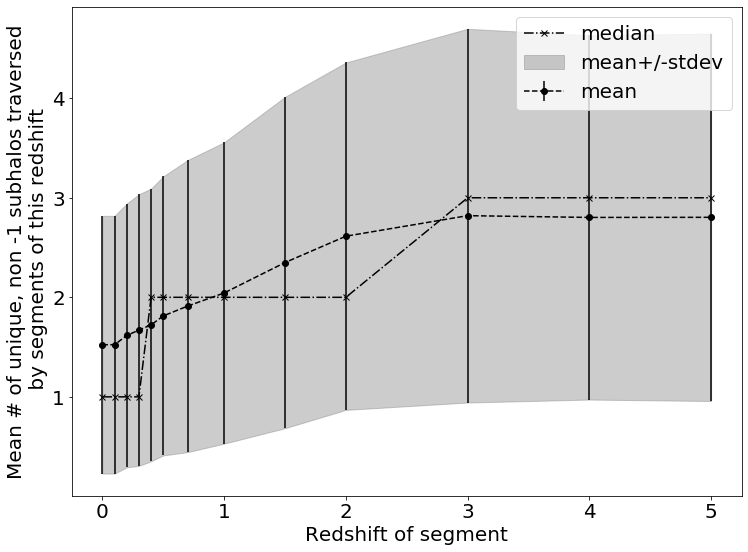

In [176]:
fig = plt.figure(figsize=(12,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax=fig.add_subplot(111)
ax.set_xlabel('Redshift of segment',fontsize=20)
ax.set_ylabel('Mean # of unique, non -1 subhalos traversed\n by segments of this redshift',fontsize=20)

ax.errorbar(z_list,snaps_shID_mean,
            snaps_shID_stdv,
            ls='--',
           marker='o',
           color='k',
           label='mean')

ax.plot(z_list,
       snaps_shID_median,
       ls='-.',
       marker='x',
       color='k',
       label='median')

ax.fill_between(z_list,
                snaps_shID_mean+(snaps_shID_stdv),
                snaps_shID_mean-(snaps_shID_stdv),
                alpha=0.4,
                color='gray',
                label='mean+/-stdev')
plt.legend(fontsize=20)
plt.savefig('Rough_Plot_Subhalo_Tracing.png',format='png')
plt.show()

# Create subhalo/galaxy data dictionaries

In [211]:
#initialise dictionaries
n_subhalos_traversed_dict = {} #non -1 subhalos
n_gals_all_traversed_dict = {} #galaxies
n_gals_wr_traversed_dict  = {} #well-resolved


#populate dictionarird with the number of unique subhalos
#traversed by each pipe in each snapshot
#and the (well-resolved) galaxies in each snapshot
n_subhalos_traversed_dict['99']=np.array(unique_sh_IDs_99)
n_gals_all_traversed_dict['99']=np.array(unique_gals_all_99)
n_gals_wr_traversed_dict['99']=np.array(unique_gals_wr_99)

n_subhalos_traversed_dict['91']=np.array(unique_sh_IDs_91)
n_gals_all_traversed_dict['91']=np.array(unique_gals_all_91)
n_gals_wr_traversed_dict['91']=np.array(unique_gals_wr_91)

n_subhalos_traversed_dict['84']=np.array(unique_sh_IDs_84)
n_gals_all_traversed_dict['84']=np.array(unique_gals_all_84)
n_gals_wr_traversed_dict['84']=np.array(unique_gals_wr_84)

n_subhalos_traversed_dict['78']=np.array(unique_sh_IDs_78)
n_gals_all_traversed_dict['78']=np.array(unique_gals_all_78)
n_gals_wr_traversed_dict['78']=np.array(unique_gals_wr_78)

n_subhalos_traversed_dict['72']=np.array(unique_sh_IDs_72)
n_gals_all_traversed_dict['72']=np.array(unique_gals_all_72)
n_gals_wr_traversed_dict['72']=np.array(unique_gals_wr_72)

n_subhalos_traversed_dict['67']=np.array(unique_sh_IDs_67)
n_gals_all_traversed_dict['67']=np.array(unique_gals_all_67)
n_gals_wr_traversed_dict['67']=np.array(unique_gals_wr_67)

n_subhalos_traversed_dict['59']=np.array(unique_sh_IDs_59)
n_gals_all_traversed_dict['59']=np.array(unique_gals_all_59)
n_gals_wr_traversed_dict['59']=np.array(unique_gals_wr_59)

n_subhalos_traversed_dict['50']=np.array(unique_sh_IDs_50)
n_gals_all_traversed_dict['50']=np.array(unique_gals_all_50)
n_gals_wr_traversed_dict['50']=np.array(unique_gals_wr_50)

n_subhalos_traversed_dict['40']=np.array(unique_sh_IDs_40)
n_gals_all_traversed_dict['40']=np.array(unique_gals_all_40)
n_gals_wr_traversed_dict['40']=np.array(unique_gals_wr_40)

n_subhalos_traversed_dict['33']=np.array(unique_sh_IDs_33)
n_gals_all_traversed_dict['33']=np.array(unique_gals_all_33)
n_gals_wr_traversed_dict['33']=np.array(unique_gals_wr_33)

n_subhalos_traversed_dict['25']=np.array(unique_sh_IDs_25)
n_gals_all_traversed_dict['25']=np.array(unique_gals_all_25)
n_gals_wr_traversed_dict['25']=np.array(unique_gals_wr_25)

n_subhalos_traversed_dict['21']=np.array(unique_sh_IDs_21)
n_gals_all_traversed_dict['21']=np.array(unique_gals_all_21)
n_gals_wr_traversed_dict['21']=np.array(unique_gals_wr_21)

n_subhalos_traversed_dict['17']=np.array(unique_sh_IDs_17)
n_gals_all_traversed_dict['17']=np.array(unique_gals_all_17)
n_gals_wr_traversed_dict['17']=np.array(unique_gals_wr_17)


# Calculate subhalos/galaxies traversed by full sightlines (one sightline)

In [212]:
############
#initialise#
############

#list of snapshots
snap_list = [99,91,84,78,72,67,59,50,40,33,25,21,17]
snap_redshifts = {} #initialise dictionary to hold their redshifts
snap_z_list = [] #initialise array to hold their redshifts

sightline_subhalos = [[0]] #set initial condition to 0 subhalos traversed at z=0
sightline_allgals = [[0]] #set initial condition to 0 galaxies traversed at z=0
sightline_wrgals = [[0]] #set initial condition to 0 well-resolved galaxies traversed at z=0


#################################
#Get redshifts for each snapshot#
#################################

#path to data
sim_to_load = 'TNG300-1' #which simulation to use
basePath = '/virgo/simulations/IllustrisTNG/{0}/output/'.format(sim_to_load)
basePath = '/ptmp/cwalker/Illustris_FRB_Project/TNG_copies/virgo/simulations/IllustrisTNG/{0}/output/'.format(sim_to_load)

#loop over snapshot headers, get redshifts
for snapshot in snap_list: #loop over snapshot
    header = il.groupcat.loadHeader(basePath,int(snapshot)) #extract simulation and snapshot header
    snap_redshifts[str(snapshot)]=header['Redshift'] #append redshift at this snapshot to dict
    snap_z_list.append(header['Redshift']) #append redshift at this snapshot to array
print('snapshot redshifts: {0}\n'.format(snap_z_list))

#################################################
#calculate subhalos traversed by full sightlines#
#################################################

#loop over snapshots
for i in range(len(snap_list)-1):
    
    #get snapshot number of this snapshot
    snap_id = str(snap_list[i])
    #get redshift of this snapshot
    snap_z = snap_z_list[i]
    
    #get snapshot number of next snapshot
    snap_id_ = str(snap_list[i+1])
    #get redshift of next snapshot
    snap_z_ = snap_z_list[i+1] 
    
    print('this i: {0}; this snap_id: {1}; this z: {2}\n'.format(i,snap_id,snap_z))
    print('next i: {0}; next snap_id: {1}; next z: {2}\n'.format(i+1,snap_id_,snap_z_))
  
    
    ################################################################
    #randomly select number of subhalos traversed for this redshift#
    ################################################################
    
    #randomly select pipe (this snapshot)
    rand_pipe_idx = np.random.choice(np.arange(len(n_subhalos_traversed_dict[snap_id])))
    #get the number of subhalos traversed (this snapshot)
    rand_nsubs_traversed = n_subhalos_traversed_dict[snap_id][rand_pipe_idx]
    #get number of galaxies traversed (this snapshot)
    rand_allgals_traversed = n_gals_all_traversed_dict[snap_id][rand_pipe_idx]
    #get number of well-resolved galaxies traversed (this snapshot)
    rand_wrgals_traversed = n_gals_wr_traversed_dict[snap_id][rand_pipe_idx]
    
    ################################################################
    #randomly select number of subhalos traversed for next redshift#
    ################################################################
    
    #randomly select pipe (next snapshot)
    rand_pipe_idx_ = np.random.choice(np.arange(len(n_subhalos_traversed_dict[snap_id_])))
    #get the number of subhalos traversed (next snapshot)
    rand_nsubs_traversed_ = n_subhalos_traversed_dict[snap_id_][rand_pipe_idx_]
    #get number of galaxies traversed (next snapshot)
    rand_allgals_traversed_ = n_gals_all_traversed_dict[snap_id_][rand_pipe_idx_]
    #get number of well-resolved galaxies traversed (next snapshot)
    rand_wrgals_traversed_ = n_gals_wr_traversed_dict[snap_id_][rand_pipe_idx_]

    print('current (next) snapshot number: {0} ({1})'.format(snap_id,snap_id_))
    print('their redshifts: {0} ({1})'.format(snap_z,snap_z_))
    print('their random pipe ids: {0} ({1})'.format(rand_pipe_idx, rand_pipe_idx_))
    print('the number of subhalos traversed by these pipe: {0} ({1})\n'.format(rand_nsubs_traversed,rand_nsubs_traversed_))
    print('the number of galaxies traversed by these pipe: {0} ({1})\n'.format(rand_allgals_traversed,rand_allgals_traversed_))
    print('the number of well-resolved galaxies traversed by these pipe: {0} ({1})\n'.format(rand_wrgals_traversed,rand_wrgals_traversed_))

    
    #need to check bit below on monday!!!
    ###############################################################################################
    #create the total number of subhalos and galaxies traversed by the sightline from these values#
    ###############################################################################################
    
    #non -1 subhalos
    next_subh_val = sightline_subhalos[i] + (0.5*(rand_nsubs_traversed+rand_nsubs_traversed_)*(snap_z_ - snap_z))
    #galaxies
    next_allgal_val = sightline_allgals[i] + (0.5*(rand_allgals_traversed+rand_allgals_traversed_)*(snap_z_ - snap_z))
    #well-resolved galaxies
    next_wrgal_val = sightline_wrgals[i] + (0.5*(rand_wrgals_traversed+rand_wrgals_traversed_)*(snap_z_ - snap_z))

    print('next: {0}'.format(next_subh_val))
    
    sightline_subhalos.append(next_subh_val) #non -1 subhalos
    sightline_allgals.append(next_allgal_val) #galaxies
    sightline_wrgals.append(next_wrgal_val) #well resolved galaxies

    
    
print('Final Results:\nsubhalos: {0}\ngalaxies: {1}\nwell-resolved galaxies: {2}'.format(np.array(sightline_subhalos),
                                                                                        np.array(sightline_allgals),
                                                                                        np.array(sightline_wrgals)))

snapshot redshifts: [2.220446049250313e-16, 0.09940180263022191, 0.19728418237600986, 0.2977176845174465, 0.3999269646135635, 0.5030475232448832, 0.7001063537185233, 0.9972942257819404, 1.4955121664955557, 2.0020281392528516, 3.008131071630377, 4.0079451114652676, 4.995933468164624]

this i: 0; this snap_id: 99; this z: 2.220446049250313e-16

next i: 1; next snap_id: 91; next z: 0.09940180263022191

current (next) snapshot number: 99 (91)
their redshifts: 2.220446049250313e-16 (0.09940180263022191)
their random pipe ids: 5007 (451)
the number of subhalos traversed by these pipe: 3 (1)

the number of galaxies traversed by these pipe: 1 (1)

the number of well-resolved galaxies traversed by these pipe: 1 (0)

next: [0.19880361]
this i: 1; this snap_id: 91; this z: 0.09940180263022191

next i: 2; next snap_id: 84; next z: 0.19728418237600986

current (next) snapshot number: 91 (84)
their redshifts: 0.09940180263022191 (0.19728418237600986)
their random pipe ids: 2037 (4296)
the number of 

# Calculate subhalos/galaxies traversed by full sightlines (many sightlines)



In [213]:
#number of lines of sight to generate
nlos = 10000000

#array of 10,000,000 random indices per each snapshot
#pipes to use will be chosen with these indices
pipe_idx_arr = np.array([np.random.choice(np.arange(len(n_subhalos_traversed_dict[str(snap_id)])),size=nlos) for snap_id in snap_list])
print('pipe index array size: {0}'.format(pipe_idx_arr.shape))
print('number of indices per snapshot: {0}'.format(pipe_idx_arr[0].shape))

#get the number of subhalos traversed by these pipes
dNsubdz_arr = np.array([n_subhalos_traversed_dict[str(snap_list[snap])][pipe_idx_arr][snap] for snap in range(len(snap_list))])
dNallgaldz_arr = np.array([n_gals_all_traversed_dict[str(snap_list[snap])][pipe_idx_arr][snap] for snap in range(len(snap_list))])
dNwrgaldz_arr = np.array([n_gals_wr_traversed_dict[str(snap_list[snap])][pipe_idx_arr][snap] for snap in range(len(snap_list))])
print('subhalos traversed by these pipes: {0}'.format(np.array(dNsubdz_arr).shape))
print('galaxies traversed by these pipes: {0}'.format(np.array(dNallgaldz_arr).shape))
print('well-resolved galaxies traversed by these pipes: {0}'.format(np.array(dNwrgaldz_arr).shape))

#create array of redshifts:
z_arr = np.array([snap_redshifts[str(snap_id)] for snap_id in snap_list])
print('array of redshifts: {0}'.format(z_arr))

#perform the calculation to get pipes traversed at each redshift
nsubs_traversed_arr = (0.5*(dNsubdz_arr[:,:][0:-1]+dNsubdz_arr[:,:][1:]))*(z_arr[:][1:]-z_arr[:][0:-1])[:,None]
allgals_traversed_arr = (0.5*(dNallgaldz_arr[:,:][0:-1]+dNallgaldz_arr[:,:][1:]))*(z_arr[:][1:]-z_arr[:][0:-1])[:,None]
wrgals_traversed_arr = (0.5*(dNwrgaldz_arr[:,:][0:-1]+dNwrgaldz_arr[:,:][1:]))*(z_arr[:][1:]-z_arr[:][0:-1])[:,None]
print('array of pipes traversed at each redshift: {0}'.format(nsubs_traversed_arr.shape))
print('array of pipes traversed at each redshift: {0}'.format(allgals_traversed_arr.shape))
print('array of pipes traversed at each redshift: {0}'.format(wrgals_traversed_arr.shape))

#add the initial condition of n subhalos traversed =0 @z=0
nsubs_traversed_arr = np.insert(nsubs_traversed_arr,0,np.zeros(nlos),axis=0)
allgals_traversed_arr = np.insert(allgals_traversed_arr,0,np.zeros(nlos),axis=0)
wrgals_traversed_arr = np.insert(wrgals_traversed_arr,0,np.zeros(nlos),axis=0)
print('array when initial 0 @ z=0 is added: {0}'.format(nsubs_traversed_arr.shape))
print('array when initial 0 @ z=0 is added: {0}'.format(allgals_traversed_arr.shape))
print('array when initial 0 @ z=0 is added: {0}'.format(wrgals_traversed_arr.shape))

#perform the cumulative sum to get the cDM for each light ray
cNsubs_arr = np.cumsum(nsubs_traversed_arr,axis=0)
cNallgals_arr = np.cumsum(allgals_traversed_arr,axis=0)
cNwrgals_arr = np.cumsum(wrgals_traversed_arr,axis=0)
print('cumulative summed: {0}'.format(cNsubs_arr.shape))
print('cumulative summed: {0}'.format(cNallgals_arr.shape))
print('cumulative summed: {0}'.format(cNwrgals_arr.shape))

pipe index array size: (13, 10000000)
number of indices per snapshot: (10000000,)
subhalos traversed by these pipes: (13, 10000000)
galaxies traversed by these pipes: (13, 10000000)
well-resolved galaxies traversed by these pipes: (13, 10000000)
array of redshifts: [2.22044605e-16 9.94018026e-02 1.97284182e-01 2.97717685e-01
 3.99926965e-01 5.03047523e-01 7.00106354e-01 9.97294226e-01
 1.49551217e+00 2.00202814e+00 3.00813107e+00 4.00794511e+00
 4.99593347e+00]
array of pipes traversed at each redshift: (12, 10000000)
array of pipes traversed at each redshift: (12, 10000000)
array of pipes traversed at each redshift: (12, 10000000)
array when initial 0 @ z=0 is added: (13, 10000000)
array when initial 0 @ z=0 is added: (13, 10000000)
array when initial 0 @ z=0 is added: (13, 10000000)
cumulative summed: (13, 10000000)
cumulative summed: (13, 10000000)
cumulative summed: (13, 10000000)


In [214]:
#calculate statistics

#non- -1 subhalos
mean_cNsubs = np.mean(cNsubs_arr,axis=1)
medi_cNsubs = np.median(cNsubs_arr,axis=1)
stdv_cNsubs = np.std(cNsubs_arr,axis=1)

#all galaxies
mean_cNallgals = np.mean(cNallgals_arr,axis=1)
medi_cNallgals = np.median(cNallgals_arr,axis=1)
stdv_cNallgals = np.std(cNallgals_arr,axis=1)

#well-resolved galaxies
mean_cNwrgals = np.mean(cNwrgals_arr,axis=1)
medi_cNwrgals = np.median(cNwrgals_arr,axis=1)
stdv_cNwrgals = np.std(cNwrgals_arr,axis=1)


print('Shapes: {0}, {1}, {2}'.format(mean_cNsubs.shape,medi_cNsubs.shape,stdv_cNsubs.shape))

Shapes: (13,), (13,), (13,)


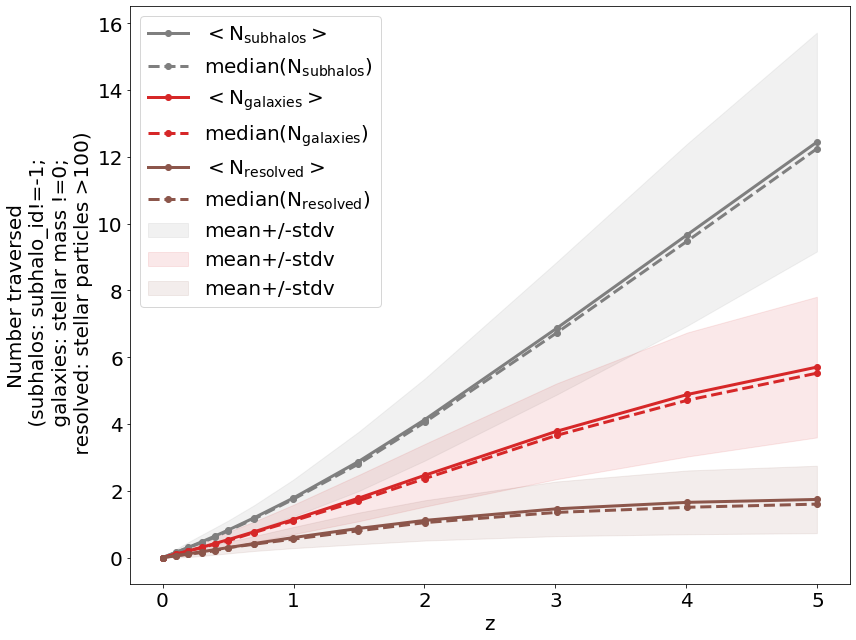

In [217]:
##################
#initialise plots#
##################

fig = plt.figure(figsize=(12,9))


ax1 = fig.add_subplot(111)
ax1.set_xlabel('z',fontsize=20)
ax1.set_ylabel('Number traversed\n (subhalos: subhalo_id!=-1;\n galaxies: stellar mass !=0;\n resolved: stellar particles >100)',fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)

#non -1 subhalos
ax1.plot(snap_z_list,mean_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{subhalos}}>$')
ax1.plot(snap_z_list,medi_cNsubs,marker='o',color='C7',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{subhalos})}$')
ax1.fill_between(snap_z_list,mean_cNsubs+stdv_cNsubs,mean_cNsubs-stdv_cNsubs,alpha=0.1,color='C7',label='mean+/-stdv')

#galaxies
ax1.plot(snap_z_list,mean_cNallgals,marker='o',color='C3',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{galaxies}}>$')
ax1.plot(snap_z_list,medi_cNallgals,marker='o',color='C3',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{galaxies})}$')
ax1.fill_between(snap_z_list,mean_cNallgals+stdv_cNallgals,mean_cNallgals-stdv_cNallgals,alpha=0.1,color='C3',label='mean+/-stdv')

#well-resolved galaxies 
ax1.plot(snap_z_list,mean_cNwrgals,marker='o',color='C5',lw=3,alpha=1,ls='-',label=r'$<{\rm N_{resolved}}>$')
ax1.plot(snap_z_list,medi_cNwrgals,marker='o',color='C5',lw=3,alpha=1,ls='--',label=r'${\rm median(N_{resolved})}$')
ax1.fill_between(snap_z_list,mean_cNwrgals+stdv_cNwrgals,mean_cNwrgals-stdv_cNwrgals,alpha=0.1,color='C5',label='mean+/-stdv')


ax1.legend(fontsize=20)
plt.tight_layout()
plt.savefig('Paper_Plot_Subhalo_Tracing_{0}.png'.format(sim_to_load),format='png')
plt.show()

#note: not all subhalos are galaxies. 
#Could do another version of this and cut non-galaxy subhalos (based on number of stellar particles)
#also need to do impact factors.

In [97]:
print(n_subhalos_traversed_dict[str(snap_list[test_snap])][pipe_idx_arr[0:2,0:2]][test_snap])

[1 0]
